In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [10]:
import os
print(os.getcwd())

d:\GitHub Desktop\Heart-disease\notebooks


In [11]:
df = pd.read_excel(r'../datasets/Heart_Disease_Dataset.xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   count                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
dtypes: float64

In [13]:
df.describe()

,count,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,150.000000,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,86.458082,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,1.000000,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,75.500000,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,150.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,224.500000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,299.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [15]:
df.head(5)

,count,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
print("Valores nulos por columna")
df.isnull().sum()

Valores nulos por columna


count                       0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

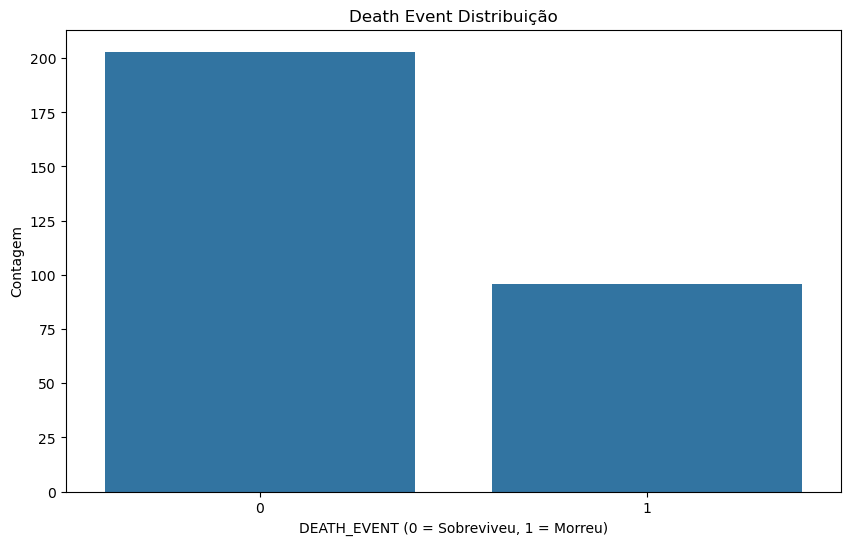

Proporção de DEATH_EVENT


DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribuição')
plt.xlabel('DEATH_EVENT (0 = Sobreviveu, 1 = Morreu)')
plt.ylabel('Contagem')
plt.show()

death_event_ratio = df['DEATH_EVENT'].value_counts(normalize=True) * 100
print("Proporção de DEATH_EVENT")
death_event_ratio

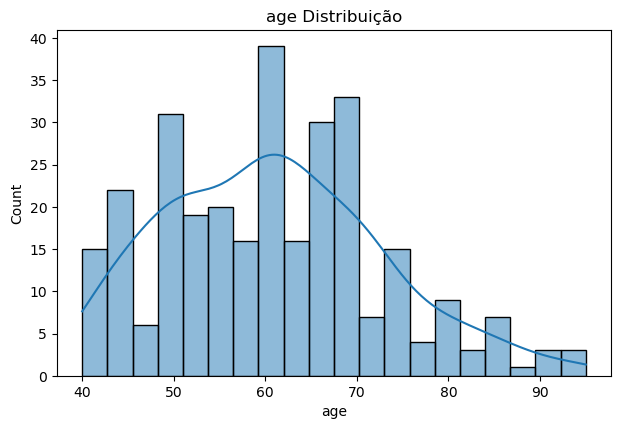

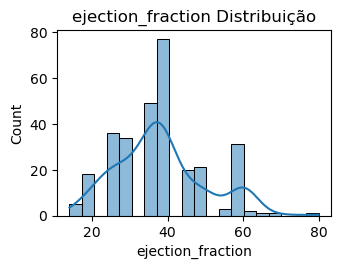

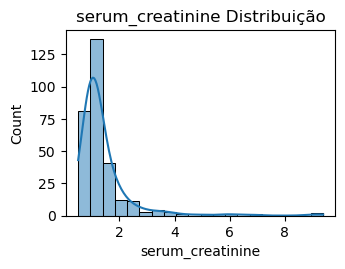

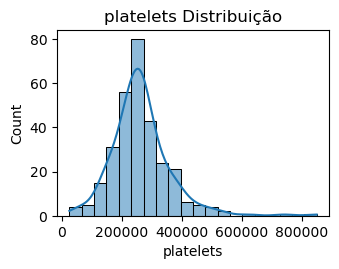

In [20]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'ejection_fraction', 'serum_creatinine', 'platelets'], 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} Distribuição')
    plt.tight_layout()
    plt.show()

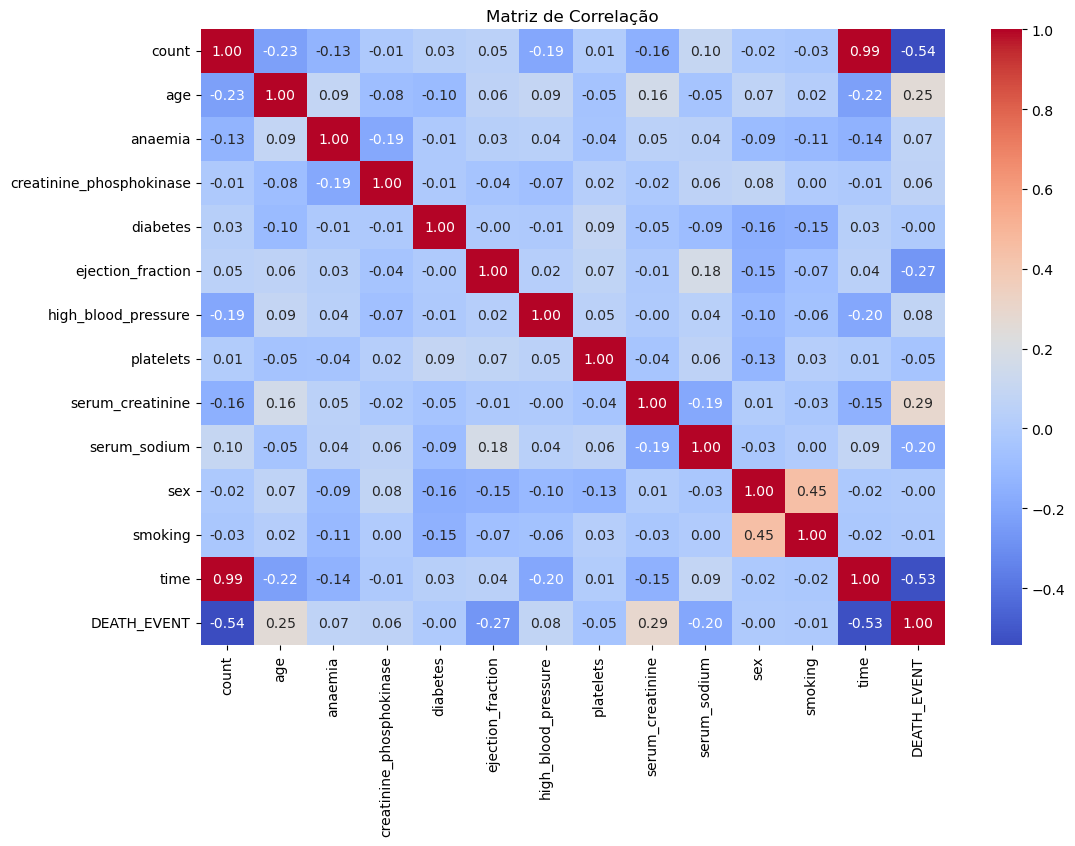

Correlação das variáveis com DEATH_EVENT


DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
count                      -0.543600
Name: DEATH_EVENT, dtype: float64

In [21]:
# Correlação entre as variáveis

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Correlação com Death Event
print("Correlação das variáveis com DEATH_EVENT")
correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)

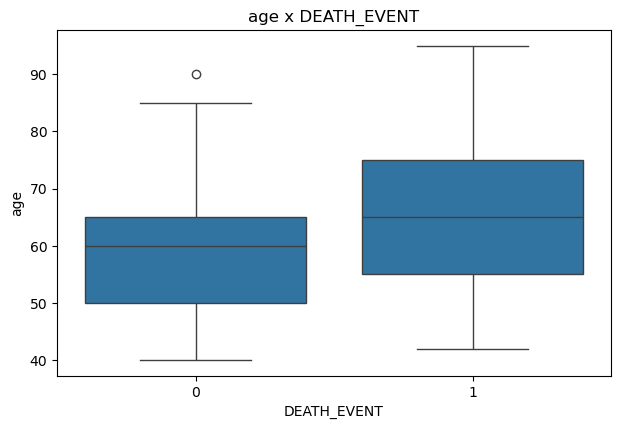

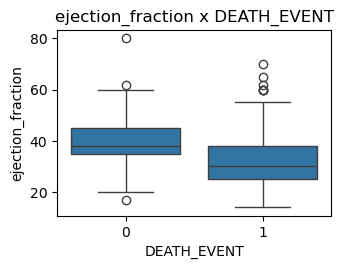

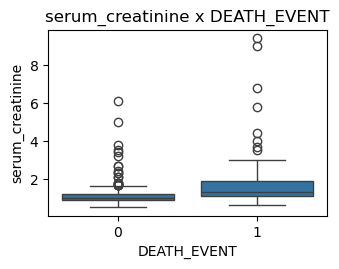

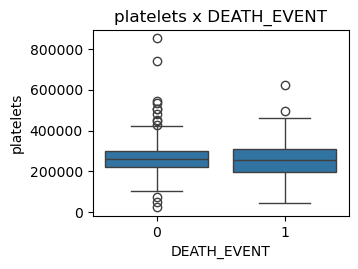

In [22]:
# Relação entre variáveis e DEATH_EVENT

plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'ejection_fraction', 'serum_creatinine', 'platelets'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    plt.title(f'{col} x DEATH_EVENT')
    plt.tight_layout()
    plt.show()

## Preparação para modelagem

### Preparação dos Dados:
- Remover a variável redundante `count`.
- Separar features (`X`) e target (`y = DEATH_EVENT`).
- Dividir em treino (80%) e teste (20%) com estratificação.
- Aplicar **SMOTE** para balancear as classes no conjunto de treino.
- Normalizar as variáveis numéricas com **StandardScaler**.

### Modelos:
- **Regressão Logística**: Baseline sensível a escalas e outliers.
- **Random Forest**: Robusto a outliers e relações não lineares.
- **XGBoost**: Gradient Boosting para desempenho otimizado em dados desbalanceados.

### Avaliação:
- Usar **F1-score**, **AUC-ROC** e **matriz de confusão**.
- Aplicar **validação cruzada (5-fold)** para robustez.

### Otimização:
- Ajustar hiperparâmetros do **Random Forest** com **GridSearchCV**.

### Interpretação:
- Analisar a importância das features no melhor modelo.

In [23]:
# Bibliotecas que vao ser usadas:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix